In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

# Basic Broadcasting rules in Python

See [NumPy's](https://numpy.org/doc/stable/user/basics.broadcasting.html) documentation on broadcasting.

In [2]:
# Solution 1, writing out the loops
def multiply_matrix(arr, C):
    """
    Multiply the matrix `arr` with a constant `C` by iterating over elements of
    `arr`
    """
    m,n = arr.shape
    out = np.zeros_like(arr)
    for i in range(m):
        for j in range(n):
            out[i,j] = C * arr[i,j]
    
    return out

# Solution 2, using numpy's broadcasting
def multiply_matrix_fast(arr, C):
    """
    Multiply the matrix `arr` with a constant `C` by broadcasting
    """
    return C * arr

In [3]:
arr = np.random.rand(20,50)

In [4]:
t1 = %timeit -o multiply_matrix(arr,2)
t2 = %timeit -o multiply_matrix_fast(arr,2)
print(f"The broadcasting function is {int(t1.average/t2.average)} times faster")

136 µs ± 981 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
795 ns ± 8.78 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
The broadcasting function is 171 times faster


We can use astropy to compare the times

In [5]:
arr1 = np.random.rand(5)
arr2 = np.random.rand(6)

arr1 + arr2, (arr1 + arr2).shape 

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

You can add two arrays over an "empty" dimension (dimension with length one) if this is the rightmost (trailing) dimension of one of the arrays

In [6]:
arr1 = np.random.rand(5)
arr2 = np.random.rand(6,1)

arr1 + arr2, (arr1 + arr2).shape 

(array([[0.35905661, 0.19977894, 0.30142301, 0.886707  , 0.63702689],
        [0.34605373, 0.18677607, 0.28842014, 0.87370413, 0.62402402],
        [0.84582652, 0.68654885, 0.78819292, 1.37347691, 1.1237968 ],
        [0.45672236, 0.29744469, 0.39908877, 0.98437276, 0.73469264],
        [0.66203313, 0.50275547, 0.60439954, 1.18968353, 0.94000342],
        [0.2848981 , 0.12562043, 0.22726451, 0.8125485 , 0.56286838]]),
 (6, 5))

In [7]:
arr1 = np.random.rand(5,1)
arr2 = np.random.rand(6)

arr1 + arr2, (arr1 + arr2).shape 

(array([[1.35024457, 1.07251602, 1.72962492, 1.37061161, 0.89234255,
         1.18956706],
        [0.54263276, 0.26490422, 0.92201312, 0.56299981, 0.08473074,
         0.38195525],
        [0.88801919, 0.61029064, 1.26739954, 0.90838623, 0.43011717,
         0.72734168],
        [1.19216955, 0.914441  , 1.57154991, 1.21253659, 0.73426753,
         1.03149204],
        [1.43784893, 1.16012038, 1.81722929, 1.45821597, 0.97994691,
         1.27717142]]),
 (5, 6))

In [8]:
### shape (4,3)
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])

### shape (3,)
b = np.array([1.0, 2.0, 3.0])

We can add `a` and `b` because they have the same length of last dimension

Text(0.5, 1.0, 'a+b')

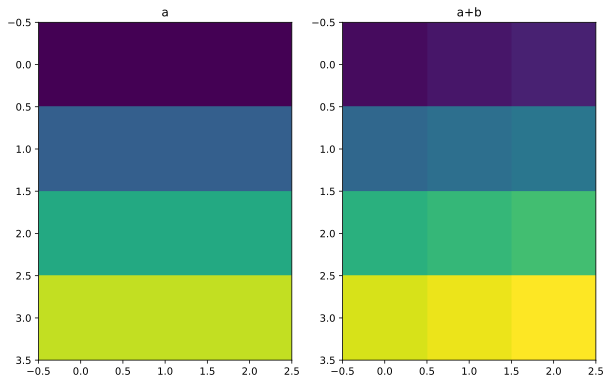

In [9]:
fig, ax = plt.subplots(ncols=2,figsize=(10,10))

ax[0].imshow(a,vmin=0,vmax=33)
ax[1].imshow(a+b,vmin=0,vmax=33)

ax[0].set_title("a")
ax[1].set_title("a+b")

In [15]:
# transpose a
aT = a.T ### shape (3,4)
aT + b

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

Since `a.T` and `b` don't have similar dimensions in the last spot, numpy cannot broadcast. We need to create a "compatible" dimension in order to broadcast `a.T` and `b`. We do this by adding an empty last dimension (trailing dimension) to `b`. Now numpy know that is can broadcast over `a.T`'s last dimension with length 4 and `b`'s last empty dimension. There are multiple ways to do this, but the easiest and recommended way is using `np.newaxis`

In [11]:
b.reshape((-1,1)).shape, b[:,None].shape, b[:,np.newaxis].shape

((3, 1), (3, 1), (3, 1))

In [13]:
b[:,np.newaxis]

array([[1.],
       [2.],
       [3.]])

In [12]:
aT + b[:,np.newaxis]

array([[ 1., 11., 21., 31.],
       [ 2., 12., 22., 32.],
       [ 3., 13., 23., 33.]])

Text(0.5, 1.0, "a'+b")

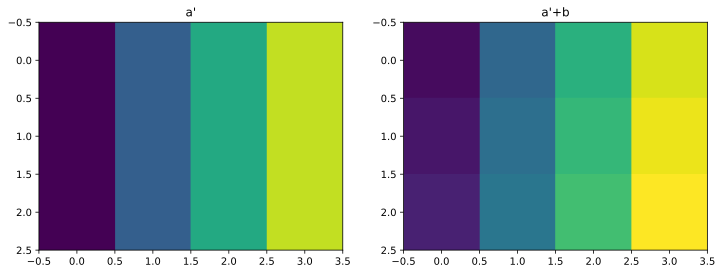

In [14]:
fig, ax = plt.subplots(ncols=2,figsize=(12,8))

ax[0].imshow(aT,vmin=0,vmax=33)
ax[1].imshow(aT+b[:,np.newaxis],vmin=0,vmax=33)

ax[0].set_title("a'")
ax[1].set_title("a'+b")